# Imports and Setup

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy

# 👑 Manually insert the best config from previous grid search
best_config = {
    "sigma": 0.2,
    "alpha": 0.002,
    "n_perturb": 200,
    "hidden_dim": 16,
    "episodes": 10,
    "iterations": 500
}


# Train with Best Config

In [10]:
# Initialize environment and policy using best config
env = CustomInvertedPendulum()
policy = SimplePolicyNet(input_dim=3, hidden_dim=best_config["hidden_dim"], output_dim=1)

# Create ES optimizer
es = EvolutionStrategy(
    policy=policy,
    env=env,
    n_perturb=best_config["n_perturb"],
    sigma=best_config["sigma"],
    alpha=best_config["alpha"],
    episodes=best_config["episodes"]
)

# Train the policy
print("Starting final training run...")
reward_history = es.optimize(best_config["iterations"])


Starting final training run...


# Plot Final Training Curve

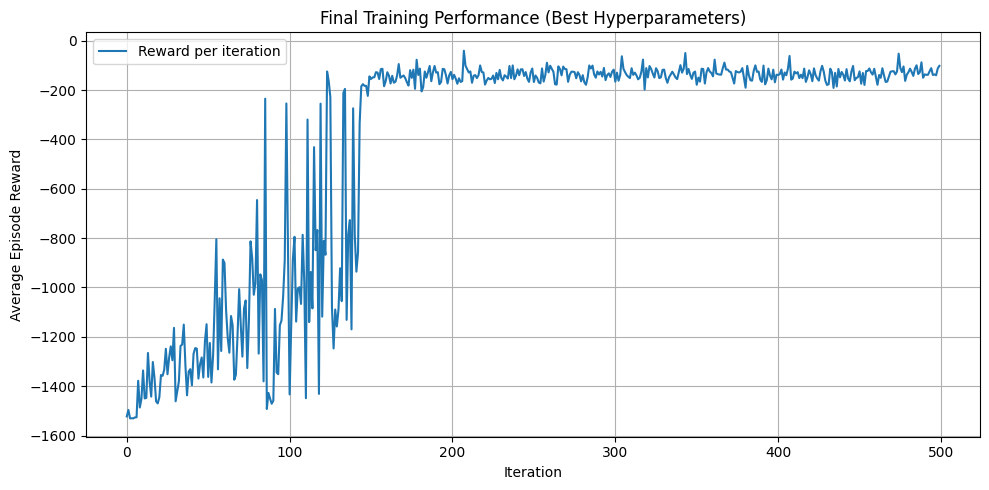

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(reward_history, label="Reward per iteration")
plt.title("Final Training Performance (Best Hyperparameters)")
plt.xlabel("Iteration")
plt.ylabel("Average Episode Reward")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Visualization of Trained Agent

In [12]:
# Run one rollout using the trained policy
states = []
rewards = []
actions = []

state = env.reset()
for _ in range(200):
    action = policy.get_action(state)
    next_state, reward, done = env.step(action)

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = next_state


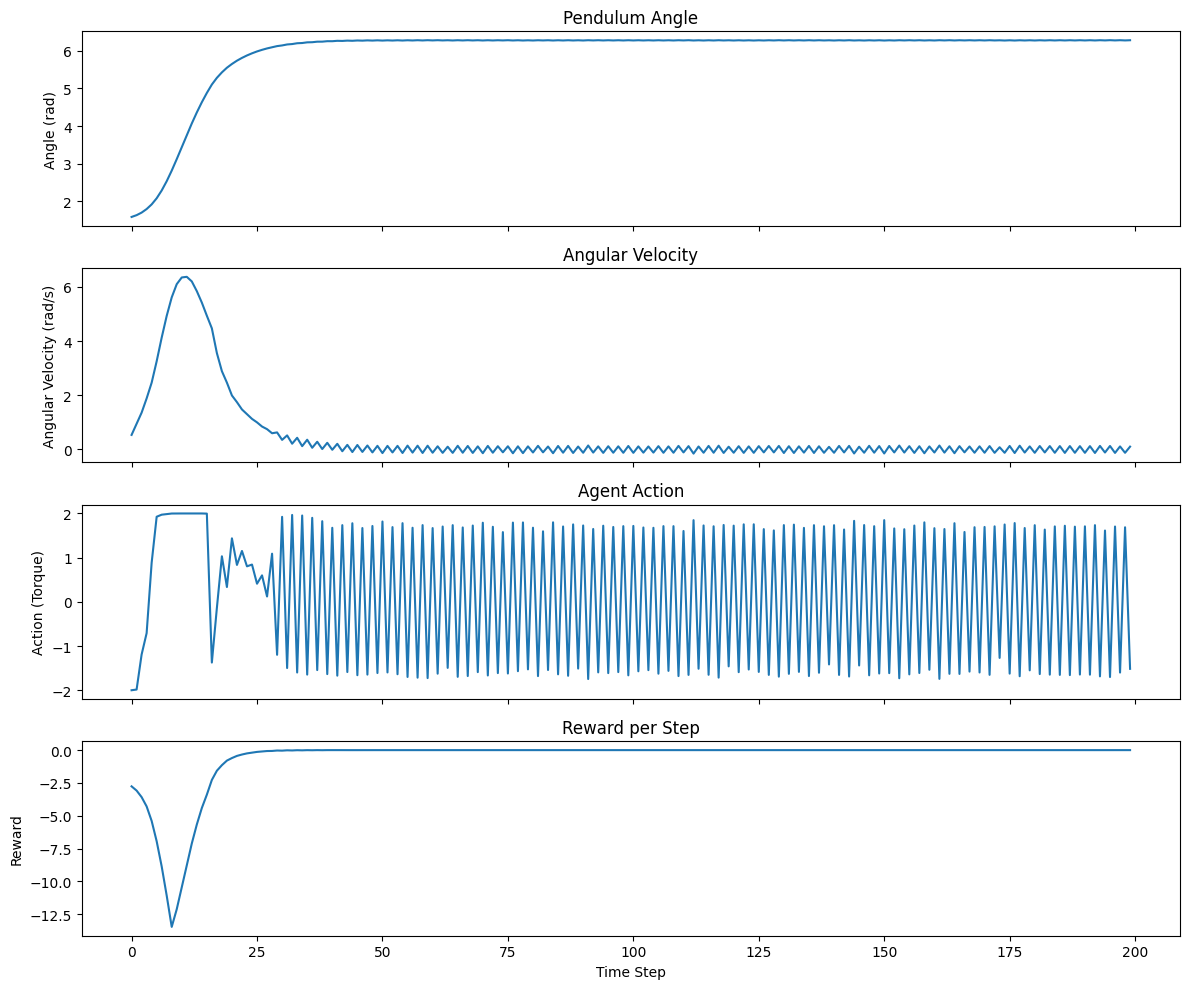

In [13]:
# Convert collected data
states = np.array(states)
angles = states[:, 0]
angular_velocities = states[:, 1]
rewards = np.array(rewards)
actions = np.array(actions)

# Plot trajectory
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(angles)
axs[0].set_ylabel("Angle (rad)")
axs[0].set_title("Pendulum Angle")

axs[1].plot(angular_velocities)
axs[1].set_ylabel("Angular Velocity (rad/s)")
axs[1].set_title("Angular Velocity")

axs[2].plot(actions)
axs[2].set_ylabel("Action (Torque)")
axs[2].set_title("Agent Action")

axs[3].plot(rewards)
axs[3].set_ylabel("Reward")
axs[3].set_xlabel("Time Step")
axs[3].set_title("Reward per Step")

plt.tight_layout()
plt.show()


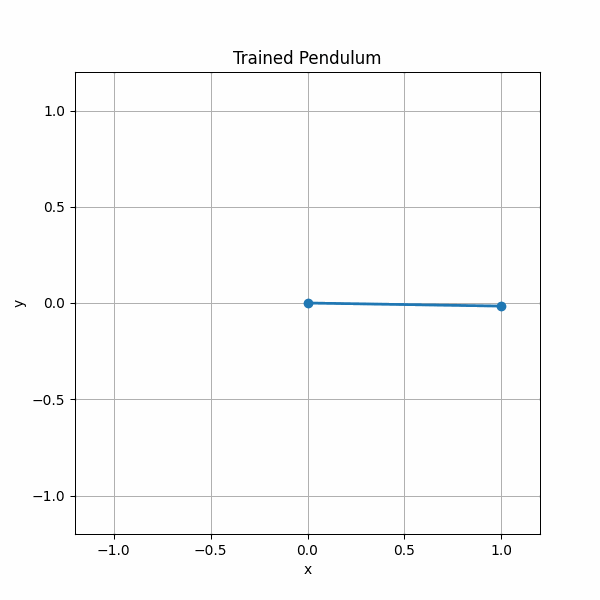

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

# Compute pendulum tip positions
L = env.L
x = L * np.sin(angles)
y = L * np.cos(angles)

# Create figure and plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-L - 0.2, L + 0.2)
ax.set_ylim(-L - 0.2, L + 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Trained Pendulum")
ax.grid(True)

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def update(i):
    line.set_data([0, x[i]], [0, y[i]])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(x), init_func=init, interval=30, blit=True)

# Save to GIF
gif_path = "../figs/trained_pendulum.gif"
ani.save(gif_path, writer="pillow", fps=30)
plt.close()

# Display the GIF
Image(filename=gif_path)
